# Project: Investigating the TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I chose the **TMDb Movie Data**. It has information on about 10kmovies, including things like the budget, revenue, cast, and genres.

I'm interested in figuring out what makes a movie successful financially and what kinds of movies are made the most.

### Questions I want to answer:
1.  **Does spending more money (Budget) mean the movie makes more money (Revenue)?**
2.  **Which genres are the most popular to produce?**

In [22]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# the packages I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# very important, it makes the graphs show up in the notebook
%matplotlib inline

In [24]:
# load csv file
df = pd.read_csv('tmdb-movies.csv')

#  size of the dataset
print("Shape of the data:", df.shape)

# first few rows
df.head()

Shape of the data: (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

Since the data isn't perfect, so I need to clean it up.
1. There are a lot of columns I don't need for my specific questions (like the homepage website).
2. I need to make sure there are no duplicate rows.
3. Some movies have a budget or revenue of '0', which isn't possible, so I'll treat those as missing data.

In [25]:
# dropping columns that aren't useful for my analysis
# i only care about money and genres right now.
drop_list = ['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords']
df.drop(columns=drop_list, inplace=True)

# here i am removing duplicates
df.drop_duplicates(inplace=True)

# then handling Zeroes


cols = ['budget_adj', 'revenue_adj']
df[cols] = df[cols].replace(0, np.nan)#nan empty
df.dropna(subset=cols, inplace=True)

# fixing the date column
df['release_date'] = pd.to_datetime(df['release_date'])

# checking the new size after cleaning
print("New shape after cleaning:", df.shape)

C:\Users\HITECH\AppData\Local\Temp\ipykernel_10580\1508645437.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


New shape after cleaning: (3854, 15)


In [26]:
# i'm going to make a function for scatter plots so I don't have to type the same code twice.
def make_scatter_plot(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

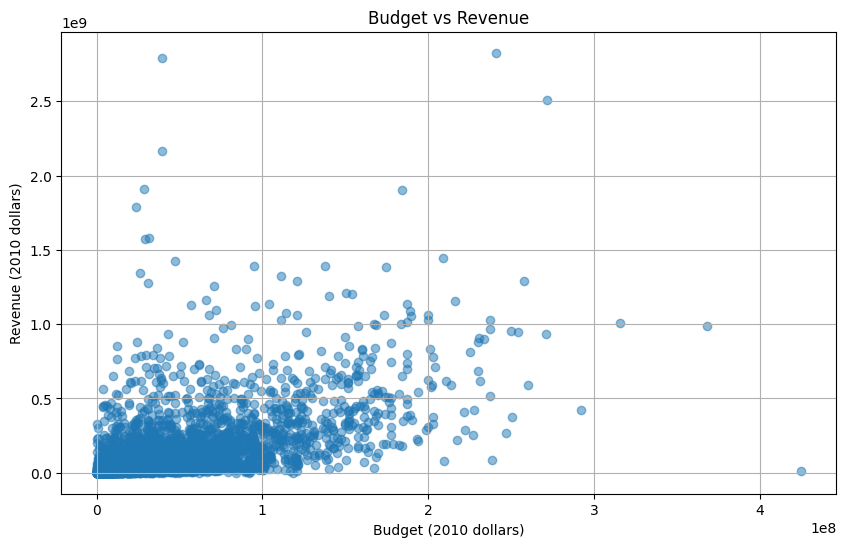

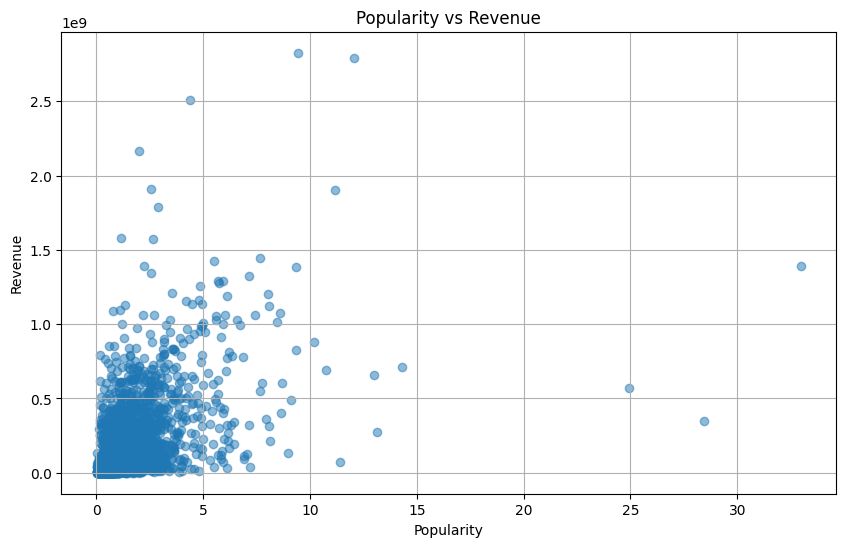

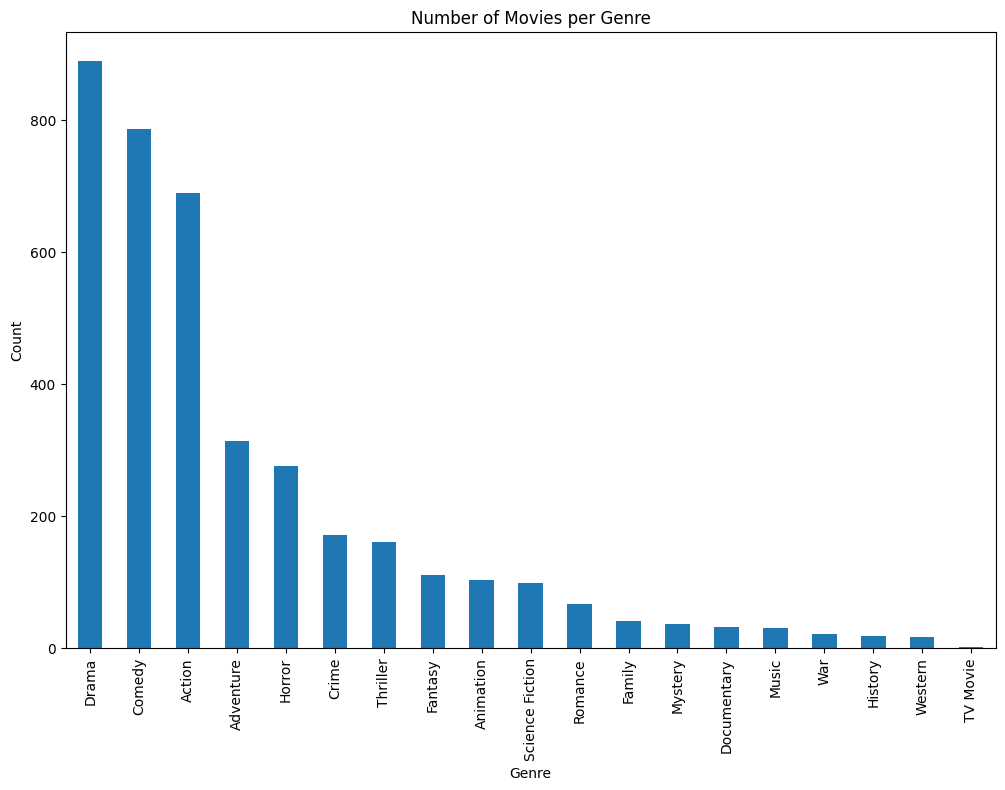

In [27]:
# --- Question 1: Budget vs Revenue
# Does a higher budget mean higher revenue?
make_scatter_plot(df, 'budget_adj', 'revenue_adj', 
                  'Budget vs Revenue', 'Budget (2010 dollars)', 'Revenue (2010 dollars)')

# --- Question 2: Popularity vs Revenue ---
# Does popularity correlate with revenue?
make_scatter_plot(df, 'popularity', 'revenue_adj', 
                  'Popularity vs Revenue', 'Popularity', 'Revenue')

# --- Question 3: Which Genres are made the most?
# The genres column has multiple genres separated by a pipe |.
# I'll just take the first one to keep it simple.
df['main_genre'] = df['genres'].apply(lambda x: str(x).split('|')[0])

# plotting the count of genres
plt.figure(figsize=(12,8))
df['main_genre'].value_counts().plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

<a id='conclusions'></a>
## Conclusion

### What I found:
1.  **Money matters:** Looking at the scatter plot, there is definitely a positive correlation between Budget and Revenue. Generally, if a movie costs more to make, it makes more money back. As well as that popularity also relates to revenue, which does make sense.
2.  **Genres:** It looks like **Drama** is the most produced genre, followed by **Comedy** and **Action**.

### Limitations of my analysis:
1.  **Dropped Data:** I had to delete a lot of rows because they had '0' for budget or revenue. That means my results are biased towards movies that actually reported their finances.
2.  **Genre Issues:** Movies usually have more than one genre (like Action AND Comedy). I only looked at the first genre listed, so this analysis oversimplifies things a bit.